# **Grafici**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.style.use("ggplot")

## **Lettura dati da file**

### Lettura dati dei nodi

In [2]:
n_load_cent = pd.read_csv("./../results/loading_nodes_cent_new.csv", index_col=[0, 1])
n_load_dist = pd.read_csv("./../results/loading_nodes_dist_new.csv", index_col=[0, 1])

n_load_cent_ack = pd.read_csv(
    "./../results/loading_nodes_cent_new_with_ack.csv", index_col=[0, 1]
)
n_load_dist_ack = pd.read_csv(
    "./../results/loading_nodes_dist_new_with_ack.csv", index_col=[0, 1]
)

Preprocessing dei dati per la lettura dei nodi

In [3]:
cols = [
    "ex",
    "qty",
    "city",
    "color",
    "country",
    "located_in",
    "movie",
    "movie_category",
    "user",
    "university",
]

n_load_cent.reset_index(inplace=True)
n_load_cent.columns = cols

n_load_dist.reset_index(inplace=True)
n_load_dist.columns = cols

n_load_cent_ack.reset_index(inplace=True)
n_load_cent_ack.columns = cols

n_load_dist_ack.reset_index(inplace=True)
n_load_dist_ack.columns = cols

### Lettura dati degli archi

In [4]:
e_load_cent = pd.read_csv("./../results/loading_edges_cent_new.csv", index_col=[0, 1])
e_load_dist = pd.read_csv("./../results/loading_edges_dist_new.csv", index_col=[0, 1])

e_load_cent_ack = pd.read_csv(
    "./../results/loading_edges_cent_new_with_ack.csv", index_col=[0, 1]
)
e_load_dist_ack = pd.read_csv(
    "./../results/loading_edges_dist_new_with_ack.csv", index_col=[0, 1]
)

Preprocessing dei dati per la lettura degli archi

In [5]:
cols = ['ex', 'qty', 'likes', 'matches']

e_load_cent.reset_index(inplace=True)
e_load_cent.columns = cols

e_load_dist.reset_index(inplace=True)
e_load_dist.columns = cols

e_load_cent_ack.reset_index(inplace=True)
e_load_cent_ack.columns = cols

e_load_dist_ack.reset_index(inplace=True)
e_load_dist_ack.columns = cols

### Lettura delle query

In [6]:
query_nodes_cent = pd.read_csv("./../results/queries_results_node_cent.csv")
query_nodes_1 = pd.read_csv("./../results/queries_results_node_1.csv")
query_nodes_2 = pd.read_csv("./../results/queries_results_node_2.csv")
query_nodes_3 = pd.read_csv("./../results/queries_results_node_3.csv")
query_nodes_4 = pd.read_csv("./../results/queries_results_node_4.csv")

## **Grafici per la versione centralizzata**

### Nodi

Unione in un unico dataframe dei nodi

In [7]:
summary_nodes_cent = (
    n_load_cent.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)

summary_nodes_cent_ack = (
    n_load_cent_ack.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)

summary_n_cent = pd.concat([summary_nodes_cent, summary_nodes_cent_ack], axis=1)
summary_n_cent.columns = ["qty", "mean", "std", "qty_ack", "mean_ack", "std_ack"]
summary_n_cent.drop("qty_ack", axis=1, inplace=True)
summary_n_cent


,qty,mean,std,mean_ack,std_ack
0,5000,3.289061,0.046995,4.083256,0.055018
1,10000,6.405218,0.047076,7.939268,0.127238
2,25000,15.704704,0.080557,19.349207,0.232263
3,50000,31.199313,0.123353,38.897267,0.426280
4,100000,62.293718,0.222520,78.748530,0.874560


Grafico confronto dei due metodi

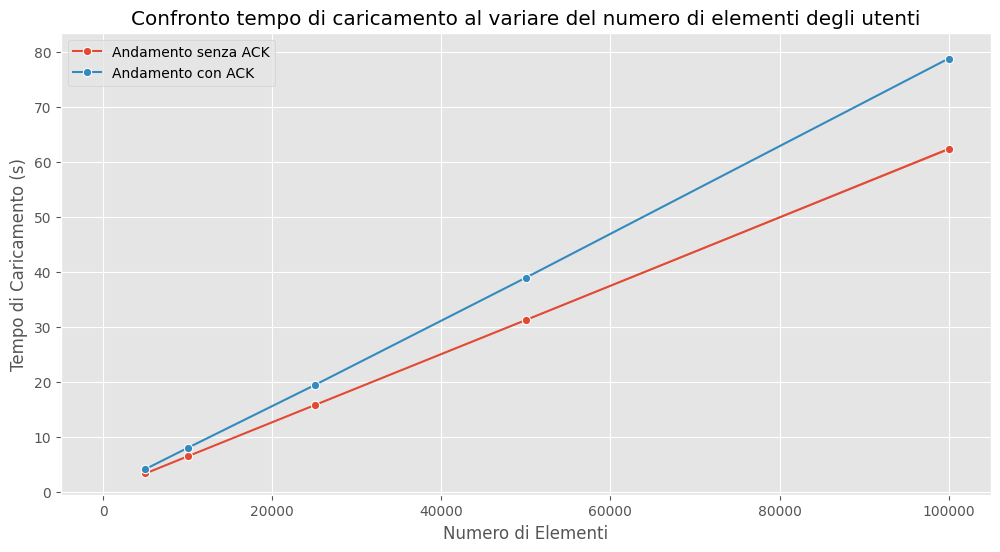

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=summary_n_cent, marker="o", label="Andamento senza ACK")
plt.fill_between(
    summary_n_cent["qty"],
    summary_n_cent["mean"] - summary_n_cent["std"],
    summary_n_cent["mean"] + summary_n_cent["std"],
    alpha=0.5,
)

sns.lineplot(x="qty", y="mean_ack", data=summary_n_cent, marker="o", label="Andamento con ACK")
plt.fill_between(
    summary_n_cent["mean_ack"],
    summary_n_cent["mean_ack"] - summary_n_cent["std_ack"],
    summary_n_cent["mean_ack"] + summary_n_cent["std_ack"],
    alpha=0.5,
)

# Personalizza il grafico
plt.title(
    "Confronto tempo di caricamento al variare del numero di elementi degli utenti"
)
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

Andamento singolo

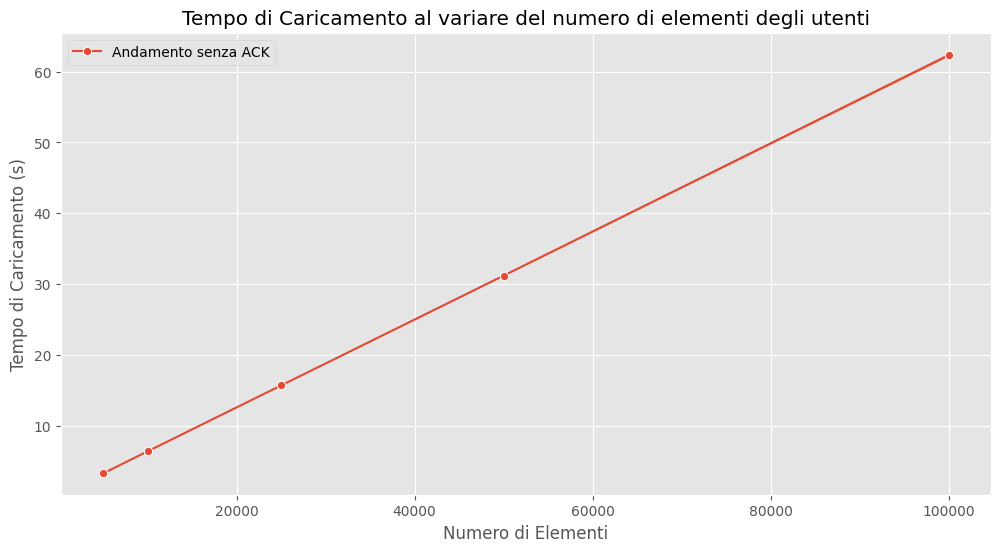

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=summary_n_cent, marker="o", label="Andamento senza ACK")
plt.fill_between(
    summary_n_cent["qty"],
    summary_n_cent["mean"] - summary_n_cent["std"],
    summary_n_cent["mean"] + summary_n_cent["std"],
    alpha=0.5,
)

# Personalizza il grafico
plt.title("Tempo di Caricamento al variare del numero di elementi degli utenti")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

### Archi

In [10]:
summary_edges_cent = (
    e_load_cent.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)

e_load_cent_ack = (
    e_load_cent_ack.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)

summary_e_cent = pd.concat([summary_edges_cent, e_load_cent_ack], axis=1)
summary_e_cent.columns = ["qty", "mean", "std", "qty_ack", "mean_ack", "std_ack"]
summary_e_cent.drop("qty_ack", axis=1, inplace=True)
summary_e_cent

,qty,mean,std,mean_ack,std_ack
0,10000,1.113222,0.073170,1.841998,0.355456
1,50000,5.264595,0.060192,7.128386,0.370986
2,100000,10.630881,0.229666,13.815185,0.674103
3,250000,26.211831,0.143768,33.051020,0.449177
4,500000,52.458667,0.235045,65.066346,0.626744
5,1000000,105.310279,0.789682,133.657192,8.953930


Grafico confronto dei due metodi

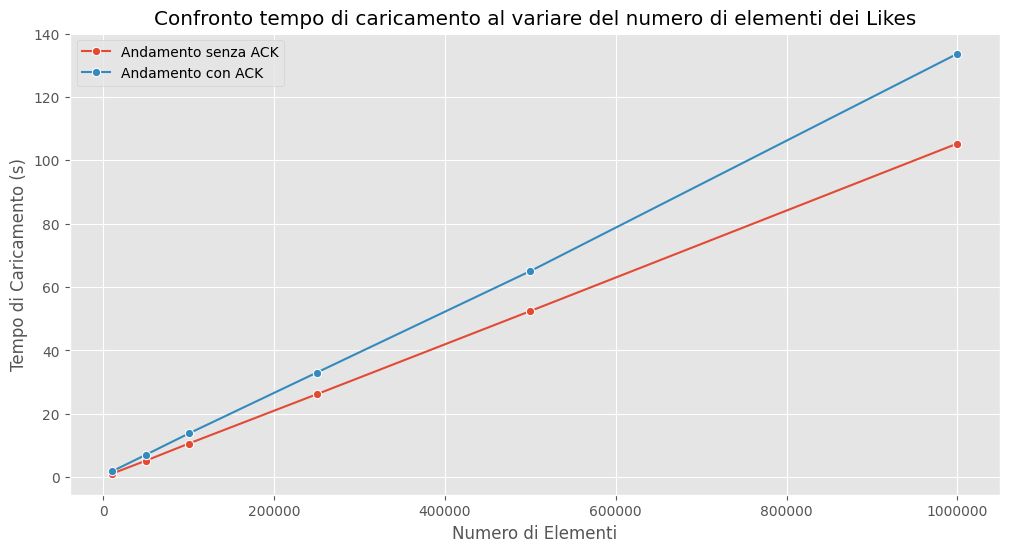

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="qty", y="mean", data=summary_e_cent, marker="o", label="Andamento senza ACK"
)
# plt.fill_between(
#     summary_e_cent["qty"],
#     summary_e_cent["mean"] - summary_e_cent["std"],
#     summary_e_cent["mean"] + summary_e_cent["std"],
#     alpha=0.5,
# )

sns.lineplot(
    x="qty", y="mean_ack", data=summary_e_cent, marker="o", label="Andamento con ACK"
)
# plt.fill_between(
#     summary_e_cent["qty"],
#     summary_e_cent["mean_ack"] - summary_e_cent["std_ack"],
#     summary_e_cent["mean_ack"] + summary_e_cent["std_ack"],
#     alpha=0.5,
# )

# Personalizza il grafico
plt.title("Confronto tempo di caricamento al variare del numero di elementi dei Likes")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
plt.show()

Grafico andamento singolo

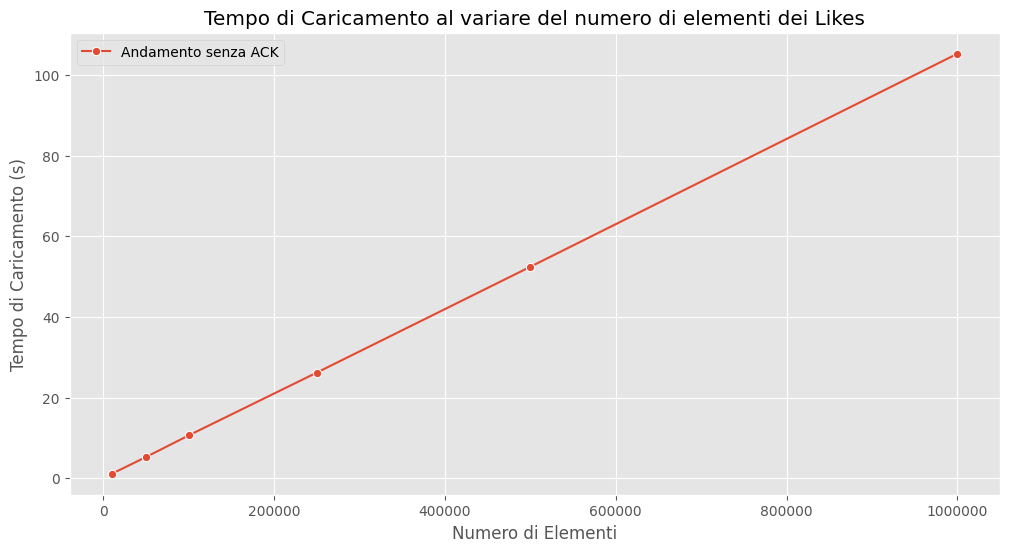

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="qty", y="mean", data=summary_e_cent, marker="o", label="Andamento senza ACK"
)
# plt.fill_between(
#     summary_e_cent["qty"],
#     summary_e_cent["mean"] - summary_e_cent["std"],
#     summary_e_cent["mean"] + summary_e_cent["std"],
#     alpha=0.5,
# )


# Personalizza il grafico
plt.title('Tempo di Caricamento al variare del numero di elementi dei Likes')
plt.xlabel('Numero di Elementi')
plt.ylabel('Tempo di Caricamento (s)')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
plt.show()

## **Grafici per la versione distribuita**

### Nodi

In [13]:
summary_nodes_dist = (
    n_load_dist.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)
summary_nodes_dist_ack = (
    n_load_dist_ack.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)

summary_n_dist = pd.concat([summary_nodes_dist, summary_nodes_dist_ack], axis=1)
summary_n_dist.columns = ["qty", "mean", "std", "qty_ack", "mean_ack", "std_ack"]
summary_n_dist.drop("qty_ack", axis=1, inplace=True)
summary_n_dist

,qty,mean,std,mean_ack,std_ack
0,5000,3.882400,0.077063,5.153385,0.390528
1,10000,7.836952,0.101610,9.622749,0.681054
2,25000,19.495651,0.336585,23.416404,0.963877
3,50000,38.565267,0.567491,46.633510,1.280828
4,100000,77.640255,0.677757,102.179223,4.557143


Grafico confronto dei due metodi

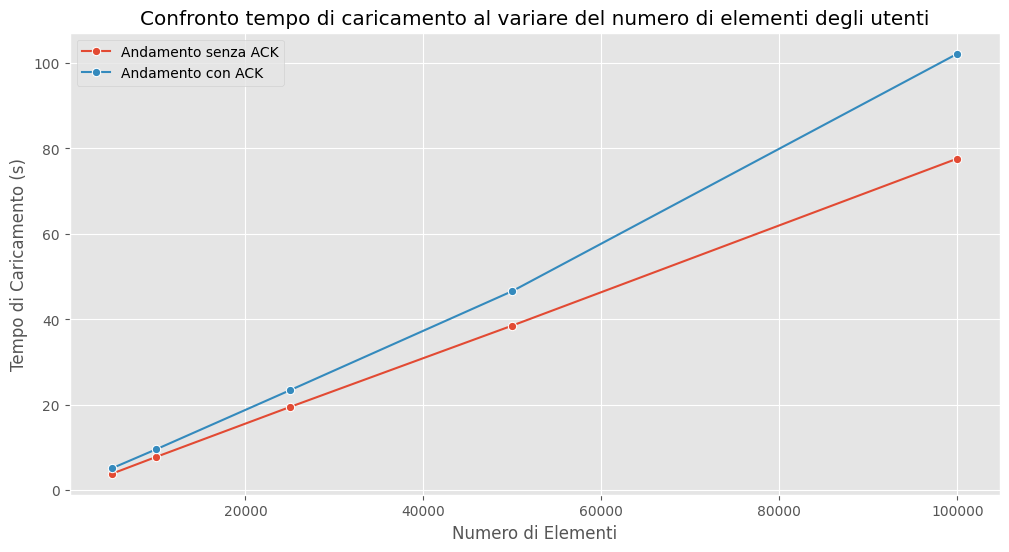

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="qty", y="mean", data=summary_n_dist, marker="o", label="Andamento senza ACK"
)
# plt.fill_between(
#     summary_n_dist["qty"],
#     summary_n_dist["mean"] - summary_n_dist["std"],
#     summary_n_dist["mean"] + summary_n_dist["std"],
#     alpha=0.5,
# )

sns.lineplot(
    x="qty", y="mean_ack", data=summary_n_dist, marker="o", label="Andamento con ACK"
)
# plt.fill_between(
#     summary_n_dist["qty"],
#     summary_n_dist["mean_ack"] - summary_n_dist["std_ack"],
#     summary_n_dist["mean_ack"] + summary_n_dist["std_ack"],
#     alpha=0.5,
# )

# Personalizza il grafico
plt.title(
    "Confronto tempo di caricamento al variare del numero di elementi degli utenti"
)
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

Grafico andamento singolo

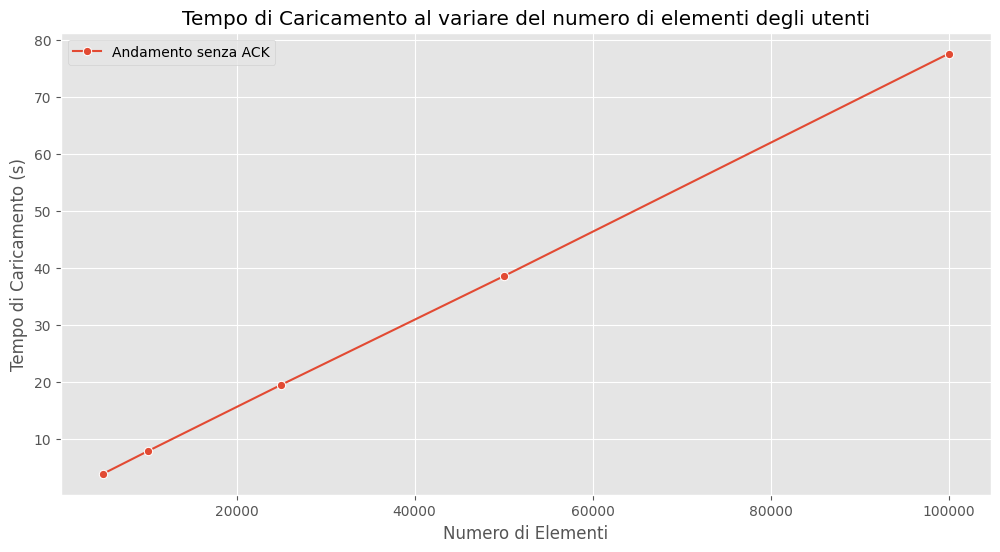

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="qty", y="mean", data=summary_n_dist, marker="o", label="Andamento senza ACK"
)
# plt.fill_between(
#     summary_n_dist["qty"],
#     summary_n_dist["mean"] - summary_n_dist["std"],
#     summary_n_dist["mean"] + summary_n_dist["std"],
#     alpha=0.5,
# )


# Personalizza il grafico
plt.title("Tempo di Caricamento al variare del numero di elementi degli utenti")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

### Archi

In [16]:
summary_edges_dist = (
    e_load_dist.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)

summary_edges_dist_ack = (
    e_load_dist_ack.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)

summary_e_dist = pd.concat([summary_edges_dist, summary_edges_dist_ack], axis=1)
summary_e_dist.columns = ["qty", "mean", "std", "qty_ack", "mean_ack", "std_ack"]
summary_e_dist.drop("qty_ack", axis=1, inplace=True)
summary_e_dist

,qty,mean,std,mean_ack,std_ack
0,10000,1.390494,0.194628,4.106851,1.951339
1,50000,6.740473,0.337397,11.723836,2.197212
2,100000,13.467751,1.004086,18.990911,1.262199
3,250000,33.637082,0.803774,40.537676,3.379788
4,500000,67.853111,3.529804,78.776783,4.512625
5,1000000,140.370458,16.620812,173.650344,63.076383


Grafico confronto dei due metodi

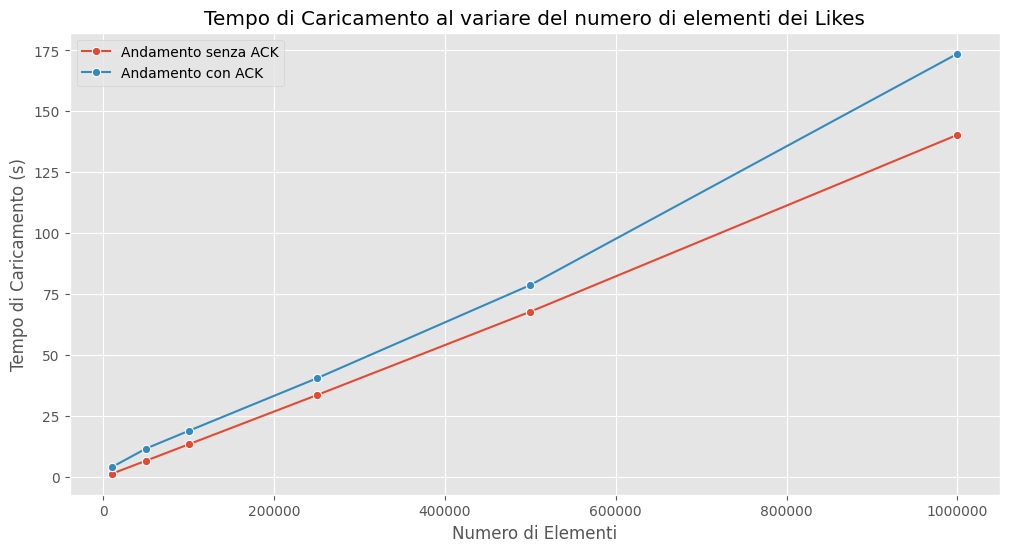

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="qty", y="mean", data=summary_e_dist, marker="o", label="Andamento senza ACK"
)
# plt.fill_between(
#     summary_e_dist["qty"],
#     summary_e_dist["mean"] - summary_e_dist["std"],
#     summary_e_dist["mean"] + summary_e_dist["std"],
#     alpha=0.5,
# )

sns.lineplot(
    x="qty", y="mean_ack", data=summary_e_dist, marker="o", label="Andamento con ACK"
)
# plt.fill_between(
#     summary_e_dist["qty"],
#     summary_e_dist["mean_ack"] - summary_e_dist["std_ack"],
#     summary_e_dist["mean_ack"] + summary_e_dist["std_ack"],
#     alpha=0.5,
# )

# Personalizza il grafico
plt.title("Tempo di Caricamento al variare del numero di elementi dei Likes")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)

plt.show()

Gratifo andamento singolo

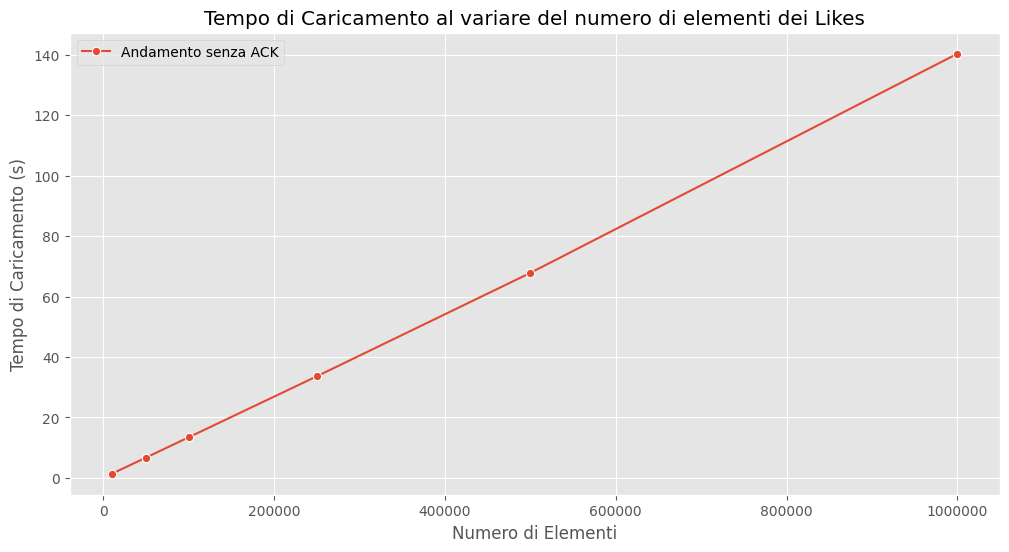

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="qty", y="mean", data=summary_e_dist, marker="o", label="Andamento senza ACK"
)
# plt.fill_between(
#     summary_e_dist["qty"],
#     summary_e_dist["mean"] - summary_e_dist["std"],
#     summary_e_dist["mean"] + summary_e_dist["std"],
#     alpha=0.5,
# )

# Personalizza il grafico
plt.title("Tempo di Caricamento al variare del numero di elementi dei Likes")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)

plt.show()

## **Confronto tra Centralized e Distributed**

### Nodi

In [19]:
compare_nodes = pd.concat(
    [summary_n_cent[["qty", "mean", "std"]], summary_n_dist[["qty", "mean", "std"]]],
    axis=1,
)
compare_nodes.columns = ["qty", "mean", "std", "qty_dist", "mean_dist", "std_dist"]
compare_nodes.drop("qty_dist", axis=1, inplace=True)
compare_nodes

,qty,mean,std,mean_dist,std_dist
0,5000,3.289061,0.046995,3.882400,0.077063
1,10000,6.405218,0.047076,7.836952,0.101610
2,25000,15.704704,0.080557,19.495651,0.336585
3,50000,31.199313,0.123353,38.565267,0.567491
4,100000,62.293718,0.222520,77.640255,0.677757


Confronto tra centralizzato e distribuito

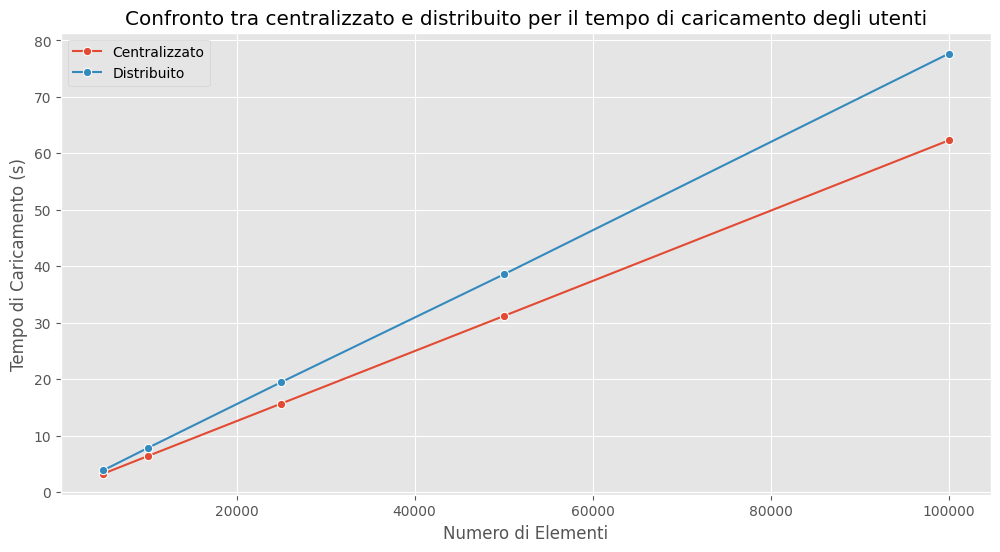

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=compare_nodes, marker="o", label="Centralizzato")
# plt.fill_between(
#     compare_nodes["qty"],
#     compare_nodes["mean"] - compare_nodes["std"],
#     compare_nodes["mean"] + compare_nodes["std"],
#     alpha=0.5,
# )

sns.lineplot(
    x="qty", y="mean_dist", data=compare_nodes, marker="o", label="Distribuito"
)
# plt.fill_between(
#     compare_nodes["qty"],
#     compare_nodes["mean_dist"] - compare_nodes["std_dist"],
#     compare_nodes["mean_dist"] + compare_nodes["std_dist"],
#     alpha=0.5,
# )

# Personalizza il grafico
plt.title(
    "Confronto tra centralizzato e distribuito per il tempo di caricamento degli utenti"
)
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)

plt.show()

### Archi

In [21]:
compare_edges = pd.concat(
    [summary_e_cent[["qty", "mean", "std"]], summary_e_dist[["qty", "mean", "std"]]],
    axis=1,
)
compare_edges.columns = ["qty", "mean", "std", "qty_dist", "mean_dist", "std_dist"]
compare_edges.drop("qty_dist", axis=1, inplace=True)
compare_edges

,qty,mean,std,mean_dist,std_dist
0,10000,1.113222,0.073170,1.390494,0.194628
1,50000,5.264595,0.060192,6.740473,0.337397
2,100000,10.630881,0.229666,13.467751,1.004086
3,250000,26.211831,0.143768,33.637082,0.803774
4,500000,52.458667,0.235045,67.853111,3.529804
5,1000000,105.310279,0.789682,140.370458,16.620812


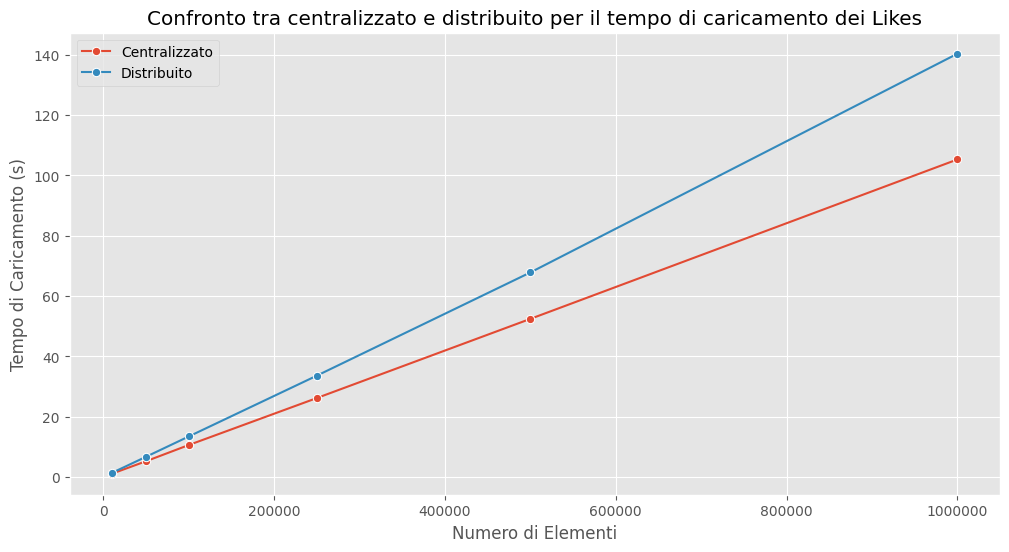

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=compare_edges, marker="o", label="Centralizzato")
# plt.fill_between(
#     compare_edges["qty"],
#     compare_edges["mean"] - compare_edges["std"],
#     compare_edges["mean"] + compare_edges["std"],
#     alpha=0.5,
# )

sns.lineplot(
    x="qty", y="mean_dist", data=compare_edges, marker="o", label="Distribuito"
)
# plt.fill_between(
#     compare_edges["qty"],
#     compare_edges["mean_dist"] - compare_edges["std_dist"],
#     compare_edges["mean_dist"] + compare_edges["std_dist"],
#     alpha=0.5,
# )

# Personalizza il grafico
plt.title(
    "Confronto tra centralizzato e distribuito per il tempo di caricamento dei Likes"
)
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)

plt.show()

## **Write Concern confronti**

In [23]:
wc1_node_df = pd.read_csv(
    "./../results/loading_nodes_dist_new_wc1.csv", index_col=[0, 1]
)
wc2_node_df = pd.read_csv(
    "./../results/loading_nodes_dist_new_wc2.csv", index_col=[0, 1]
)
wc3_node_df = pd.read_csv(
    "./../results/loading_nodes_dist_new_wc3.csv", index_col=[0, 1]
)

In [24]:
cols = [
    "ex",
    "qty",
    "city",
    "color",
    "country",
    "located_in",
    "movie",
    "movie_category",
    "user",
    "university",
]

wc1_node_df.reset_index(inplace=True)
wc1_node_df.columns = cols

wc2_node_df.reset_index(inplace=True)
wc2_node_df.columns = cols

wc3_node_df.reset_index(inplace=True)
wc3_node_df.columns = cols

In [25]:
summary_wc1_node_df = (
    wc1_node_df.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)

summary_wc2_node_df = (
    wc2_node_df.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)

summary_wc3_node_df = (
    wc3_node_df.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)

Grafico riassuntivo

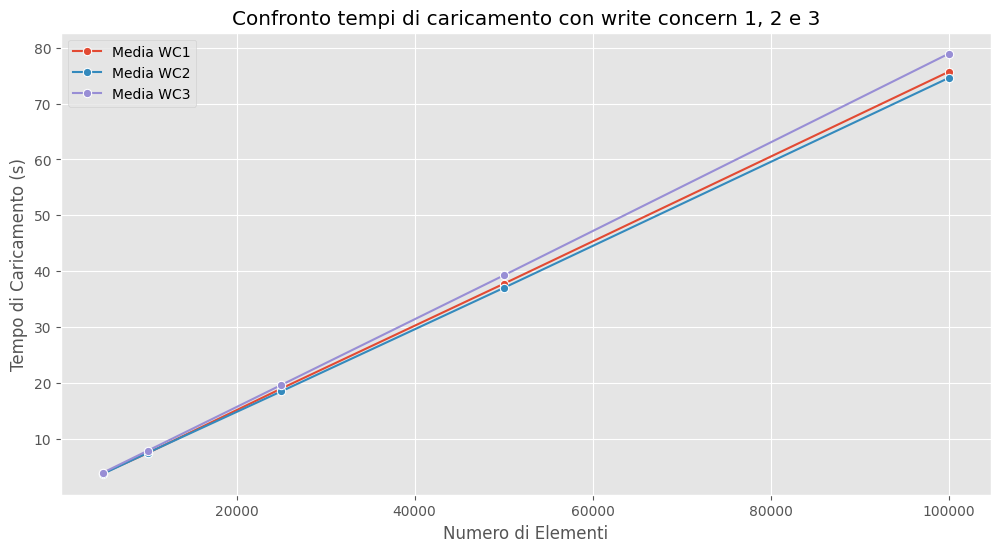

In [26]:
plt.figure(figsize=(12, 6))

sns.lineplot(x="qty", y="mean", data=summary_wc1_node_df, marker="o", label="Media WC1")
# plt.fill_between(
#     summary_wc1_node_df["mean"],
#     summary_wc1_node_df["mean"] - summary_wc1_node_df["std"],
#     summary_wc1_node_df["mean"] + summary_wc1_node_df["std"],
#     alpha=0.5,
#     label="STD",
# )

sns.lineplot(x="qty", y="mean", data=summary_wc2_node_df, marker="o", label="Media WC2")
# plt.fill_between(
#     summary_wc2_node_df["mean"],
#     summary_wc2_node_df["mean"] - summary_wc2_node_df["std"],
#     summary_wc2_node_df["mean"] + summary_wc2_node_df["std"],
#     alpha=0.5,
#     label="STD",
# )

sns.lineplot(x="qty", y="mean", data=summary_wc3_node_df, marker="o", label="Media WC3")
# plt.fill_between(
#     summary_wc3_node_df["mean"],
#     summary_wc3_node_df["mean"] - summary_wc3_node_df["std"],
#     summary_wc3_node_df["mean"] + summary_wc3_node_df["std"],
#     alpha=0.5,
#     label="STD",
# )

# Personalizza il grafico
plt.title("Confronto tempi di caricamento con write concern 1, 2 e 3")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

## **Letture**

Confronto tempi raggruppati ogni 10 esecuzioni e  boxplot

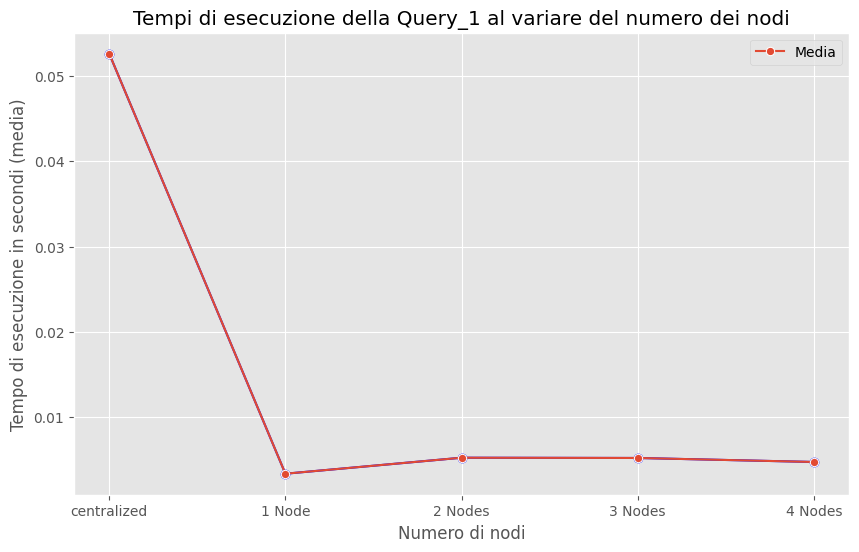

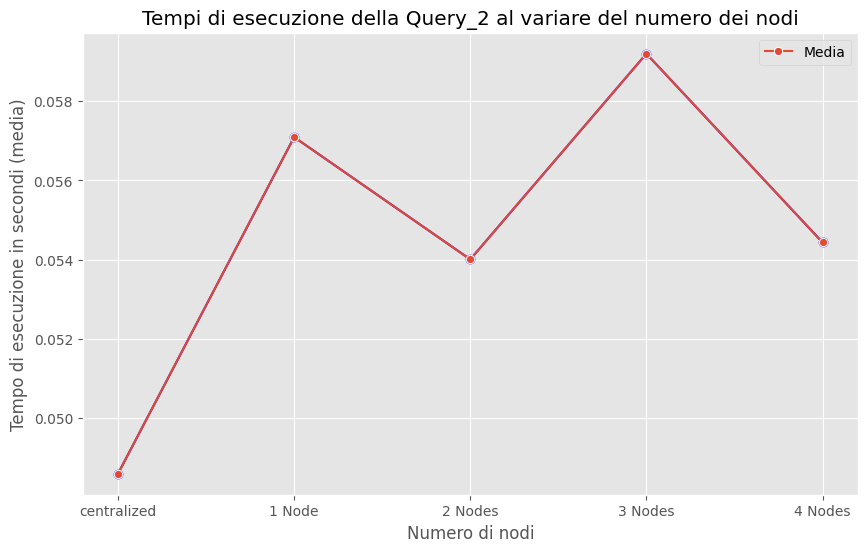

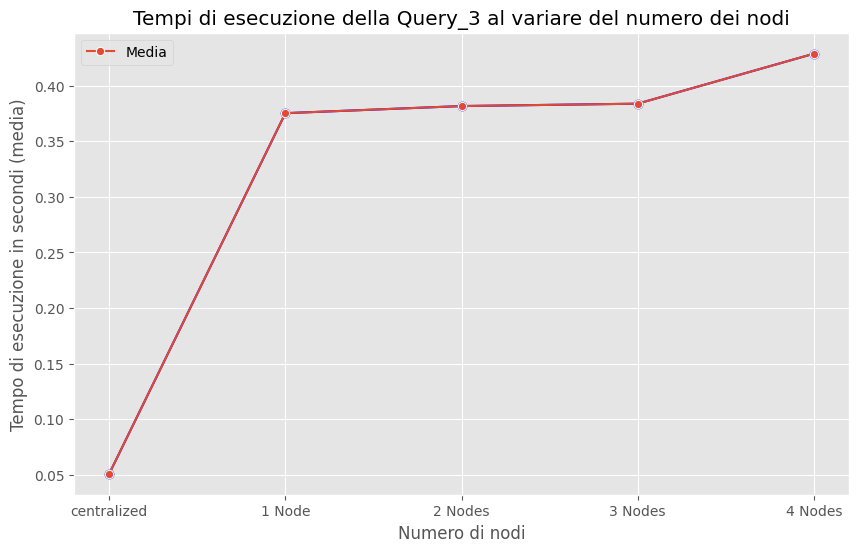

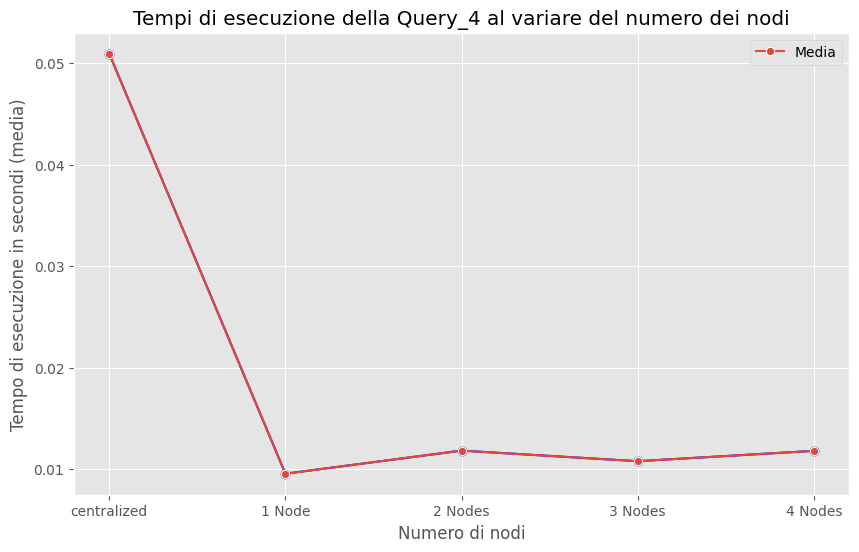

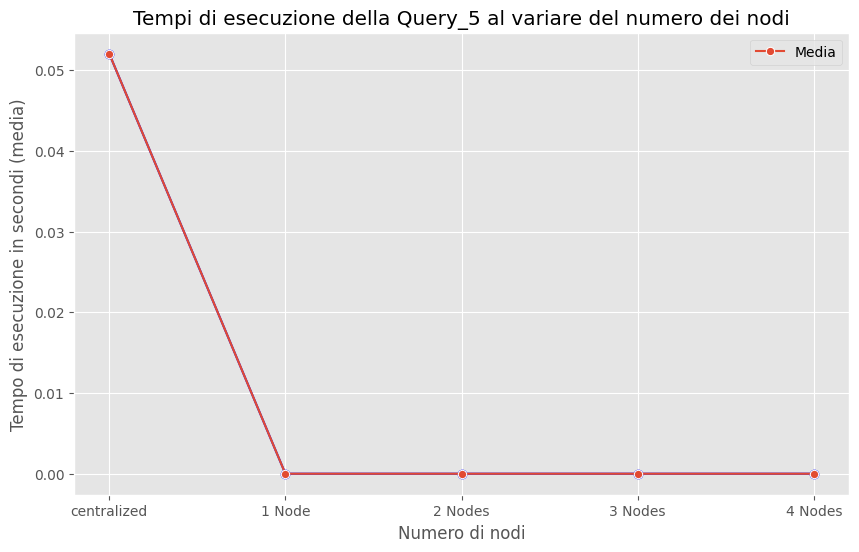

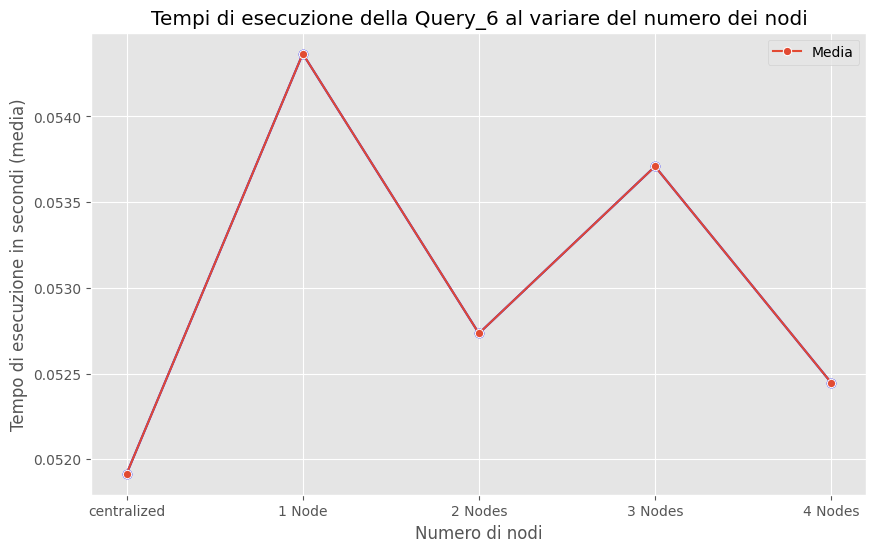

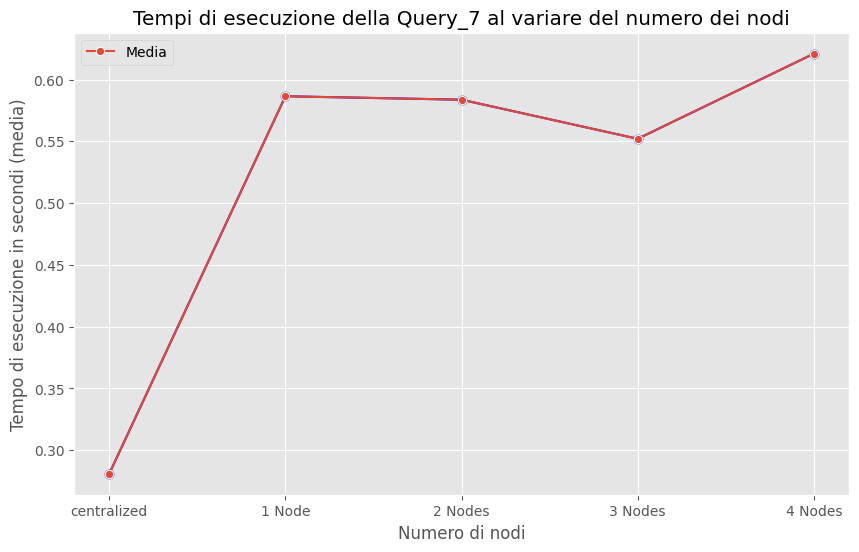

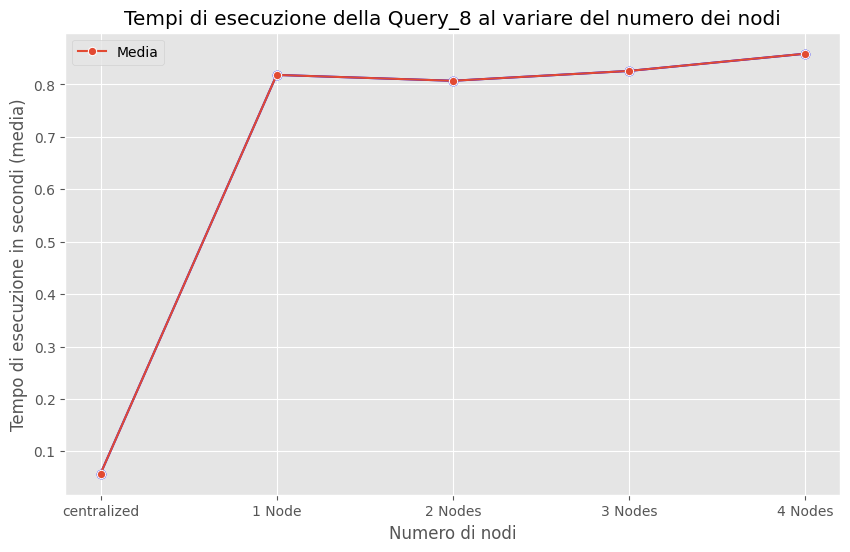

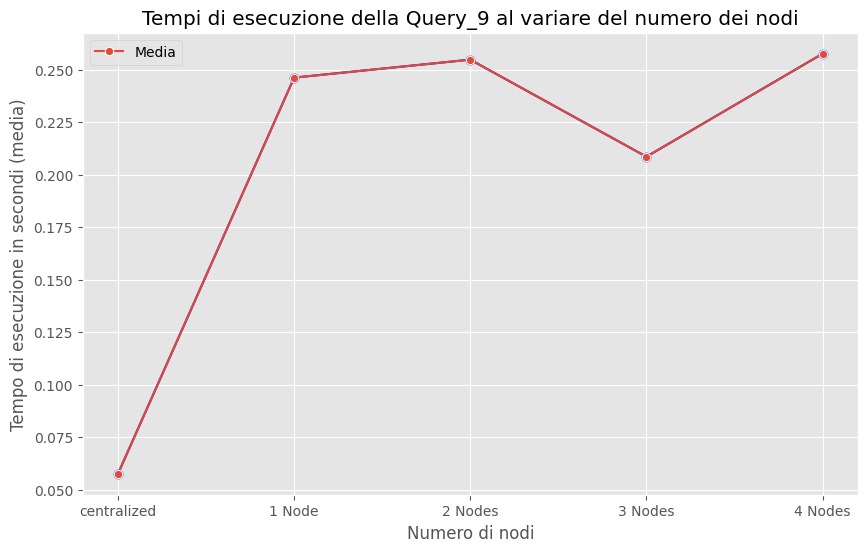

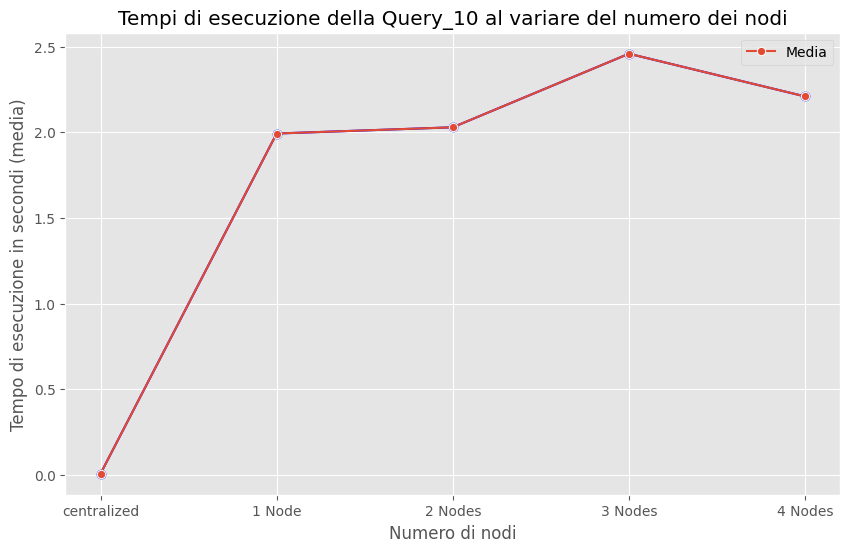

In [27]:
queries = ["Query_2", "Query_3", "Query_8", "Query_9", "Query_10"]

for col in query_nodes_cent.columns:
    tmp = pd.DataFrame()
    tmp["centralized"] = query_nodes_cent[col]
    tmp["1 Node"] = query_nodes_1[col]
    tmp["2 Nodes"] = query_nodes_2[col]
    tmp["3 Nodes"] = query_nodes_3[col]
    tmp["4 Nodes"] = query_nodes_4[col]

    mean_times = tmp.mean()
    std_times = tmp.std()

    # Creare un grafico a linee
    plt.figure(figsize=(10, 6))
    plt.plot(mean_times.index, mean_times.values, marker="o", linestyle="-", color="b")

    sns.lineplot(x=mean_times.index, y=mean_times.values, marker="o", label="Media")
    # plt.fill_between(
    #     mean_times.index,
    #     mean_times.values - std_times.values,
    #     mean_times.values + std_times.values,
    #     alpha=0.5,
    # )
    
    plt.title(f'Tempi di esecuzione della {col} al variare del numero dei nodi')
    plt.xlabel('Numero di nodi')
    plt.ylabel('Tempo di esecuzione in secondi (media)')
    plt.grid(True)
    plt.show()

    plt.show()